In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
import os
main_folder = os.getcwd()

In [3]:
feature_names = pd.read_csv('S:/2016_223 IDEALIST/ANALYTIC CORE/MySurgeryRisk PostOP V1.0/3 Users/Lasith/IntraOp_model-DECLARE/Model/Data/all_intraop_features.csv')

In [4]:
feature_names=feature_names.set_index('variable')

In [5]:
data = pd.read_csv(main_folder+'/all_clean_feature_to_model_aki7.csv')

In [6]:
outcomes = pd.read_csv(main_folder+'/aki7Day_prediction_from_intraOP+preOP_probs_from_train2038.csv')
temp = pd.read_csv(main_folder+'/aki7Day_prediction_from_intraOP+preOP_probs_from_test873.csv')
temp = temp.rename(columns={'pred_from_intraOp':'pred_from_intraPreOp'})
outcomes = outcomes.append(temp)

In [7]:
outcomes = outcomes.sort_values(by='acc').reset_index(drop=True)

In [8]:
data = data.sort_values(by='acc').reset_index(drop=True)

In [9]:
outcomes.head()

,acc,true_AKI_outcome,pred_from_intraPreOp
0,580863520,1,0.868575
1,581104353,1,0.805433
2,581775897,1,0.943307
3,581844123,1,0.703255
4,581848827,1,0.698359


In [10]:
data.head()

,acc,sys_mean_base,sys_var_long,sys_var_short,sys_count_ll_45,sys_perct_ll_45,sys_count_ul_163,sys_perct_ul_163,sys_range_26_43,sys_perct_range_26_43,...,O2CTA_abPerc,O2SATA_abPerc,RBC_abPerc,RDW_abPerc,WBC_abPerc,PF_ratio,surg_time_min,isNight_surg,anes_type,aki7day
0,580863520,98.9,20.1,7.2,9.0,0.9,5.0,0.5,4.0,0.4,...,100.000000,0.000000,100.0,100.0,0.0,129.684211,565.400000,0,0,1
1,581104353,104.1,31.7,8.0,37.0,3.6,11.0,1.1,30.0,2.9,...,0.000000,0.000000,0.0,100.0,0.0,122.959184,597.666667,1,0,1
2,581775897,89.0,13.9,11.4,6.0,0.8,6.0,0.8,3.0,0.4,...,100.000000,0.000000,0.0,0.0,0.0,189.693878,420.250000,0,0,1
3,581844123,89.7,22.6,5.5,9.0,0.9,1.0,0.1,7.0,0.7,...,0.000000,100.000000,0.0,0.0,0.0,74.285714,532.583333,0,0,1
4,581848827,113.9,14.5,5.1,0.0,0.0,4.0,0.6,0.0,0.0,...,33.333333,33.333333,0.0,0.0,100.0,65.353535,421.450000,0,0,1


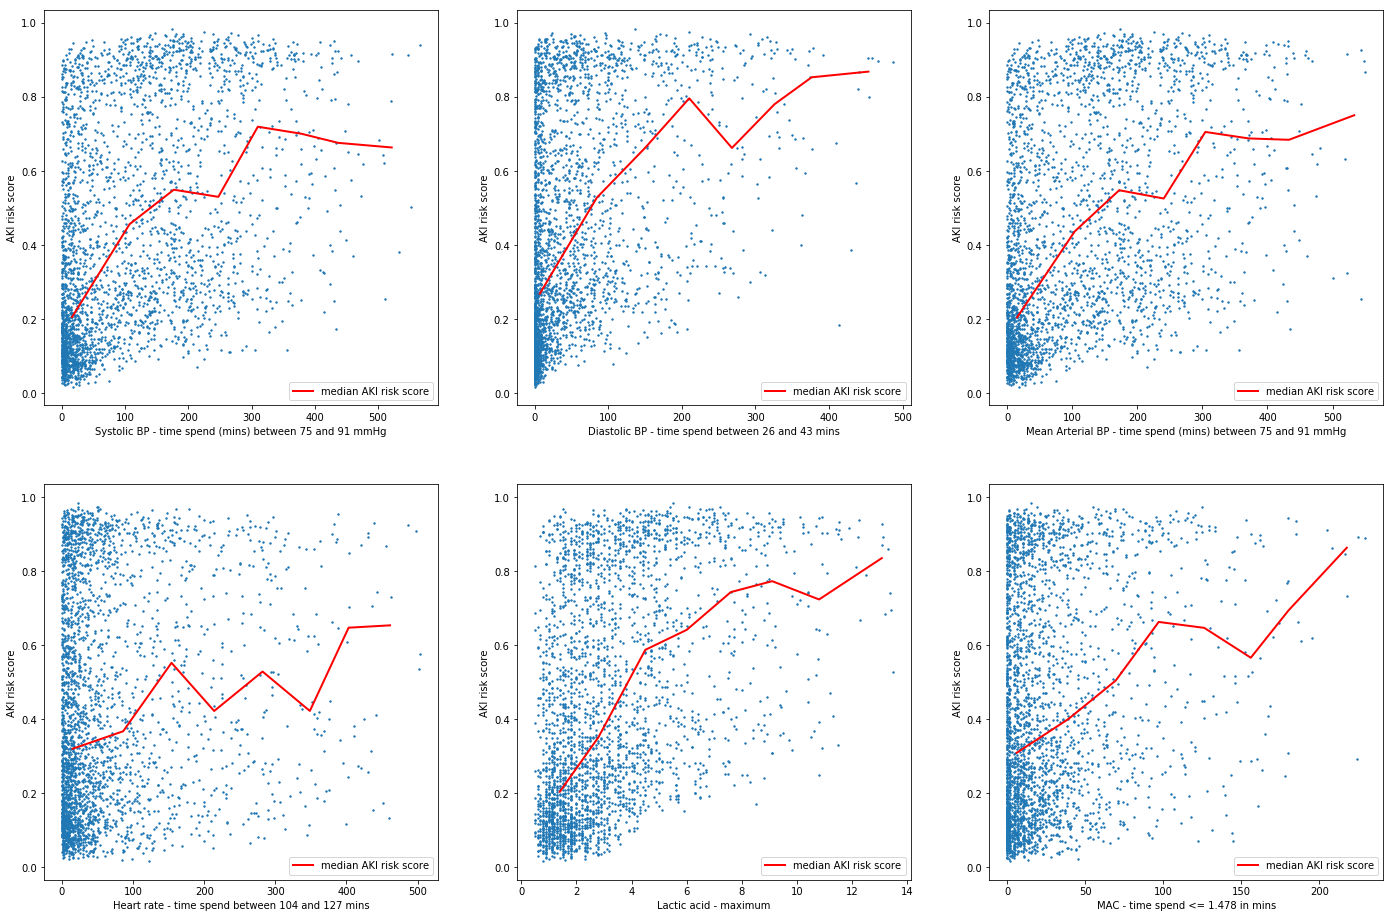

In [11]:
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(24, 16))
from itertools import chain
list_ax = list(chain.from_iterable(axs))
list_variables = ['sys_range_75_91', 'dia_range_26_43', 'map_range_75_91',
                  'hr_range_104_127', 'LAWB_max', 'mac_count_ul_1.47726726185345']
no_bins = 8
lw=2
point_area = 2
line_color = 'red'
for idx, ax in enumerate(list_ax):
    ax.scatter(data[list_variables[idx]], outcomes['pred_from_intraPreOp'], s=point_area, label=None)
    ax.set_ylabel('AKI risk score')
    ax.set_xlabel(feature_names.loc[list_variables[idx]]['full_name'])
    temp = pd.concat([data[[list_variables[idx]]], outcomes[['pred_from_intraPreOp']]], axis=1)
    temp = temp.groupby(pd.cut(temp[list_variables[idx]], bins=no_bins)).median()
    temp = temp.dropna()
    ax.plot(temp[list_variables[idx]], temp['pred_from_intraPreOp'],
                       color=line_color, lw=lw, label='median AKI risk score')
    ax.legend(loc='lower right')

plt.savefig("correlation_vitals.eps", format='eps')
plt.show()

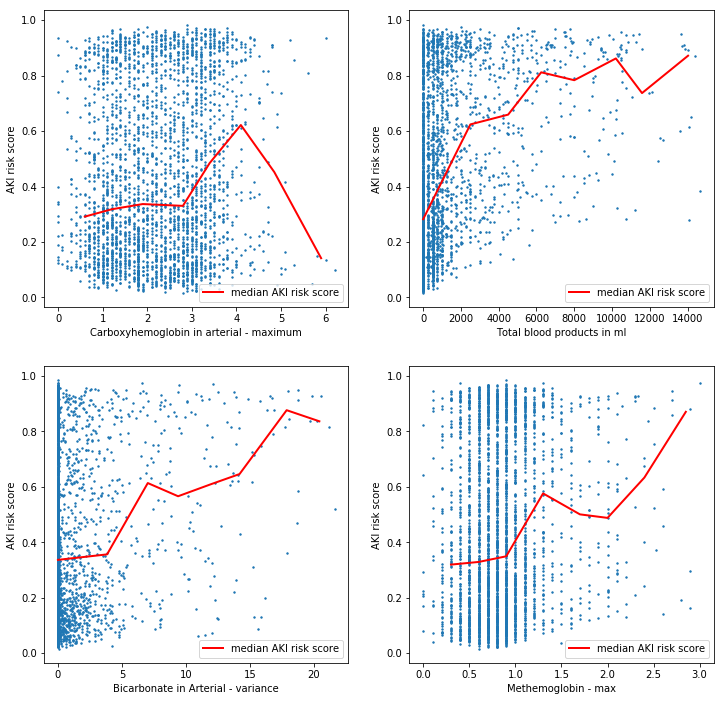

In [12]:
fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(12, 12))
from itertools import chain
list_ax = list(chain.from_iterable(axs))
list_variables = ['COHBA_max', 'blood_product_ml', 'HCO3A_var',
                  'METHBA_max']
no_bins = 8
lw=2
point_area = 2
line_color = 'red'
for idx, ax in enumerate(list_ax):
    ax.scatter(data[list_variables[idx]], outcomes['pred_from_intraPreOp'], s=point_area, label=None)
    ax.set_ylabel('AKI risk score')
    ax.set_xlabel(feature_names.loc[list_variables[idx]]['full_name'])
    temp = pd.concat([data[[list_variables[idx]]], outcomes[['pred_from_intraPreOp']]], axis=1)
    temp = temp.groupby(pd.cut(temp[list_variables[idx]], bins=no_bins)).median()
    temp = temp.dropna()
    ax.plot(temp[list_variables[idx]], temp['pred_from_intraPreOp'],
                       color=line_color, lw=lw, label='median AKI risk score')
    ax.legend(loc='lower right')

plt.savefig("correlation_arterial_blood_gas.eps", format='eps')
plt.show()

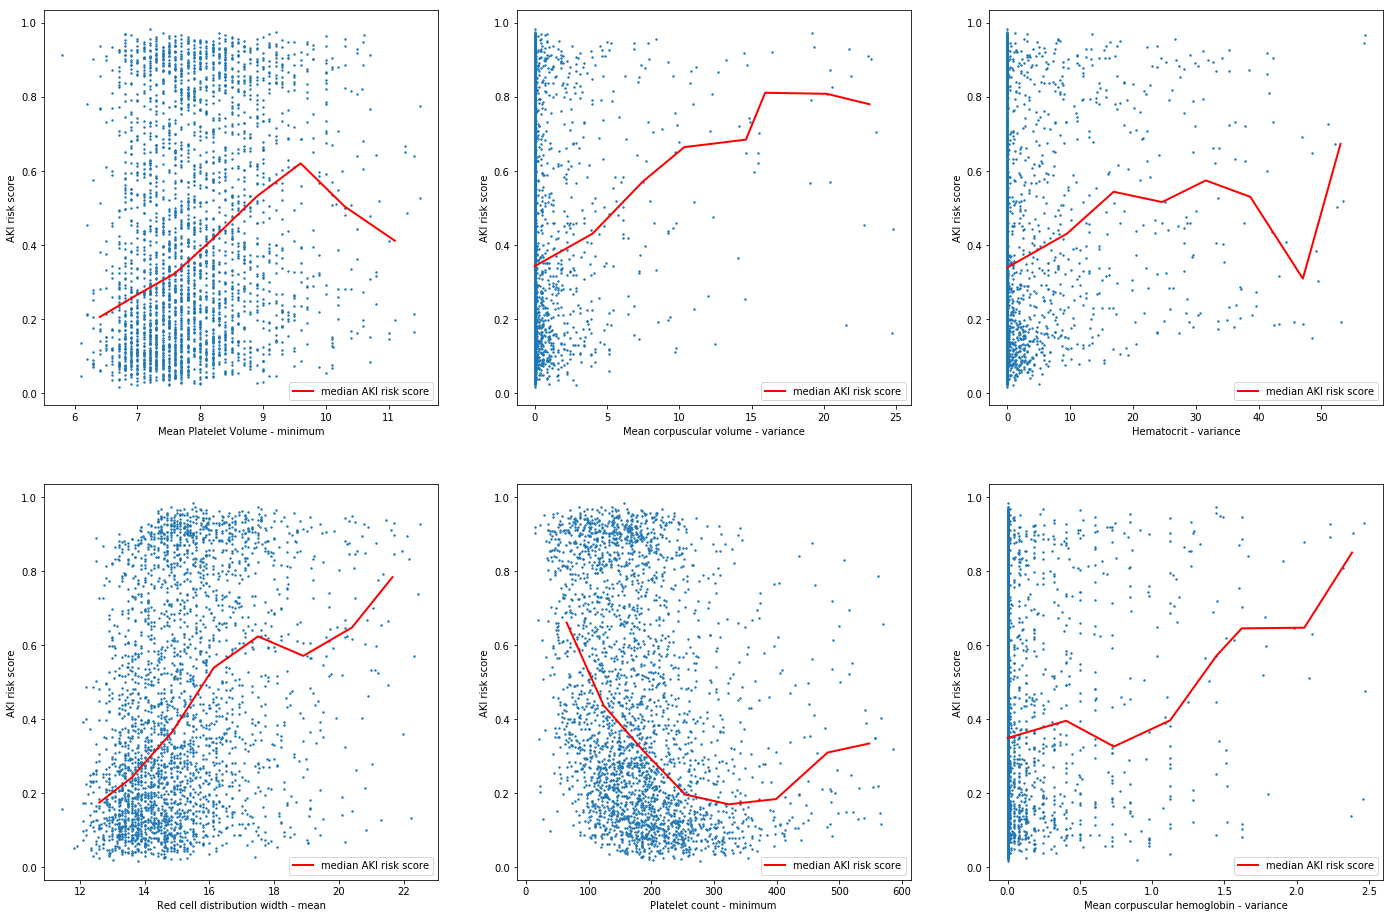

In [13]:
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(24, 16))
from itertools import chain
list_ax = list(chain.from_iterable(axs))
list_variables = ['MPV_min', 'MCV_var', 'HCT_var',
                  'RDW_mean', 'PLT_min', 'MCH_var']
no_bins = 8
lw=2
point_area = 2
line_color = 'red'
for idx, ax in enumerate(list_ax):
    ax.scatter(data[list_variables[idx]], outcomes['pred_from_intraPreOp'], s=point_area, label=None)
    ax.set_ylabel('AKI risk score')
    ax.set_xlabel(feature_names.loc[list_variables[idx]]['full_name'])
    temp = pd.concat([data[[list_variables[idx]]], outcomes[['pred_from_intraPreOp']]], axis=1)
    temp = temp.groupby(pd.cut(temp[list_variables[idx]], bins=no_bins)).median()
    temp = temp.dropna()
    ax.plot(temp[list_variables[idx]], temp['pred_from_intraPreOp'],
                       color=line_color, lw=lw, label='median AKI risk score')
    ax.legend(loc='lower right')

plt.savefig("correlation_complete_blood_count.eps", format='eps')
plt.show()

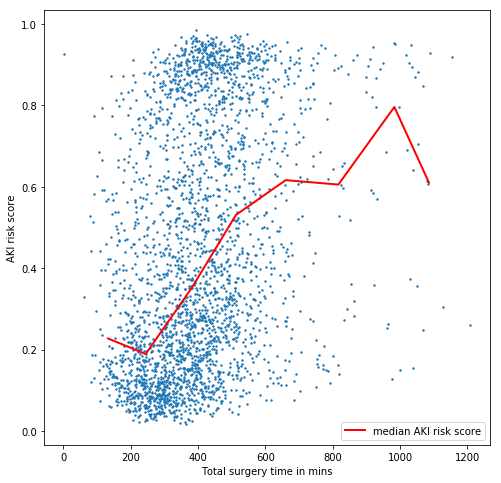

In [15]:
fig, axs = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(8, 8))
from itertools import chain
list_ax = list([axs])
list_variables = ['surg_time_min']
no_bins = 8
lw=2
point_area = 2
line_color = 'red'
for idx, ax in enumerate(list_ax):
    ax.scatter(data[list_variables[idx]], outcomes['pred_from_intraPreOp'], s=point_area, label=None)
    ax.set_ylabel('AKI risk score')
    ax.set_xlabel(feature_names.loc[list_variables[idx]]['full_name'])
    temp = pd.concat([data[[list_variables[idx]]], outcomes[['pred_from_intraPreOp']]], axis=1)
    temp = temp.groupby(pd.cut(temp[list_variables[idx]], bins=no_bins)).median()
    temp = temp.dropna()
    ax.plot(temp[list_variables[idx]], temp['pred_from_intraPreOp'],
                       color=line_color, lw=lw, label='median AKI risk score')
    ax.legend(loc='lower right')

plt.savefig("correlation_other.eps", format='eps')
plt.show()